In [262]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
conn = sqlite3.connect("database.db")
cursor = conn.cursor()



In [263]:
#Check to see what the data looks like 
student_info = pd.read_csv('./Updated_Performance.csv')
print(student_info.head())

    Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0  SID20131143        Sem_1  SEMI0012995    Paper 1     44             5
1  SID20131143        Sem_1  SEMI0015183    Paper 2     74             8
2  SID20131143        Sem_1  SEMI0018371    Paper 3     80             8
3  SID20131143        Sem_1  SEMI0015910    Paper 4     44             5
4  SID20131143        Sem_1  SEMI0016208    Paper 5     95            12


In [264]:
student_info.shape

(209600, 6)

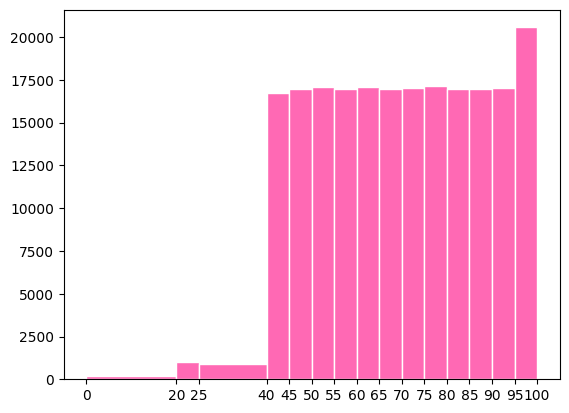

In [265]:
marks = student_info['Marks']
bins=[0, 20, 25, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.hist(marks, bins=bins,edgecolor ='w', color='hotpink')
plt.xticks(bins)
plt.show()

### This data is not normally distributed and so this analysis might not yield any notable results 

<AxesSubplot:title={'center':'Scatter plot of Effort Hours vs Marks'}, xlabel='Effort_Hours', ylabel='Marks'>

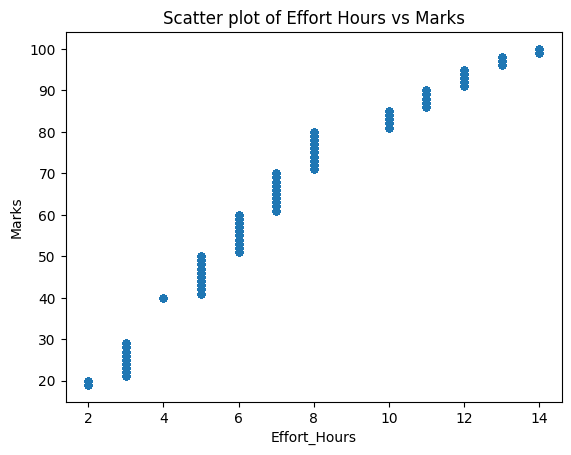

In [266]:
student_info.plot.scatter(x='Effort_Hours', y='Marks', title='Scatter plot of Effort Hours vs Marks')

### This data looks very odd, it seems like the effort_hours are only whole numbers 

##### The following function takes data in the form of [['effort_hours', 'marks', 'department_admission']] and the students ID, and will return a string containing the information. This function will work for any single students data in this form. Although if you ignored the studentID and departmentID this model would work for the full data set 

In [267]:
def linearRegress(student_full, id):
    student = student_full[['effort_hours', 'marks']]
    # print(student.corr())
    # print(student.describe())
    y = student['marks'].values.reshape(-1,1)
    x = student['effort_hours'].values.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    def calc(hours):
        return reg.predict([[hours]])
    score = calc(10)
    # y_pred = reg.predict(x_test)
    # preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()}) This would predict for a set of test values chosen at random from the original data set
    # mean_absol_err = mean_absolute_error(y_test, y_pred)
    # mean_squar_err = mean_squared_error(y_test, y_pred)
    # root_mean_squar = np.sqrt(mean_squar_err)
    deptID = student_full['department_admission'].values[0]
    results = f'StudentID: {id} \nPredicted Score: {score} \nDepartment: {deptID}\n\n'.format(id = id, score = score, deptID = deptID)
    return (results)

##### The commented out sections of code above were simply used for determining if the data given would give a proper prediction

In [268]:
studentIDs = ['SID20131151', 'SID20149500', 'SID20182516']

In [269]:

for row in studentIDs:
    student_full = pd.read_sql_query(f"""SELECT Performance.effort_hours, Performance.marks, Student.department_admission
                  FROM Performance
                  INNER JOIN Student ON Performance.student_ID = Student.student_ID
                  WHERE Performance.student_ID = '{row}'""", conn)
    print(linearRegress(student_full, row))
    

StudentID: SID20131151 
Predicted Score: [[82.091761]] 
Department: IDEPT6347


StudentID: SID20149500 
Predicted Score: [[81.97564057]] 
Department: IDEPT4308


StudentID: SID20182516 
Predicted Score: [[82.22862079]] 
Department: IDEPT3062




##### These results seem to line up with the scatter plot we made at the beginning